In [14]:
from __future__ import print_function
from pixell import enmap,utils, reproject, enplot
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import urllib.request
from astropy.table import QTable
import astropy.units as u
from astropy.io import fits
%matplotlib inline



In [19]:
mdcw_catalog = fits.open('/home/s/sievers/sdicker/ACTnCOWs/MADCOWSUnion.fits')

2839


In [71]:
def stack(ras, decs, map1, mask1, map2 = None, mask2 = None, width = 20.):
        stack = 0
        divisor = 0
        for i in range(len(ras)):
                tempdec, tempra = np.deg2rad([decs[i], ras[i]])
                tempwid = np.deg2rad(width/60.)
                box = [[tempdec-tempwid,tempra-tempwid],[tempdec+tempwid,tempra+tempwid]]
                maskstamp = mask1.submap(box)
                #Check if the stamp is entirely within borders, i.e. if the mask stamp is entirely ones
                if np.any(maskstamp[0]):
                        stamp = reproject.postage_stamp(map1, ras[i], decs[i], width, 0.5)
                        if stamp is None: continue
                        stack += stamp[0]
                        divisor += 1
                        continue
                if map2 is None: continue
                #If a second map is to be checked, repeat above with second map
                maskstamp = mask2.submap(box)
                if np.any(maskstamp[0]):
                        #print(i)
                        stamp = reproject.postage_stamp(map2, ras[i], decs[i], width, 0.5)
                        if stamp is None: continue
                        stack += stamp[0]
                        divisor += 1

        stack /= divisor
        print("Number in stack: {}".format(divisor))
        return stack, divisor


Number in stack: 944


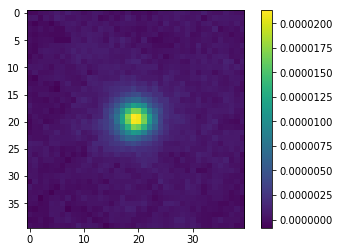

In [66]:
mappath = '/scratch/r/rbond/msyriac/data/depot/tilec/v1.2.0_20200324/map_v1.2.0_joint_boss/'

t = QTable.read('madcows/AdvACT_S18Clusters_v1.0-beta.fits')

boss_mask = enmap.read_map(mappath + "tilec_mask.fits")
boss_map = enmap.read_map(mappath + 'tilec_single_tile_boss_comptony_map_v1.2.0_joint.fits')

ra_temp = t['RADeg']
dec_temp = t['decDeg']
ra, dec = np.array(ra_temp), np.array(dec_temp)

boss_stack = stack(ra, dec, boss_map, boss_mask)
plt.imshow(boss_stack)
plt.colorbar()
plt.show()
#plt.savefig("boss_stack_act_y.png")
plt.close()




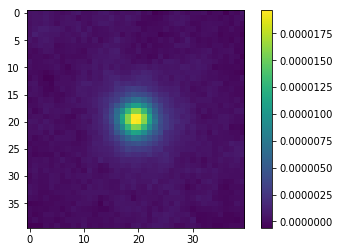

In [17]:
#plots = enplot.plot(enmap.upgrade(boss_stack,5),grid=False, colorbar=True,color='gray')
#enplot.write("boss_stack_act_y",plots)

d56_path = '/scratch/r/rbond/msyriac/data/depot/tilec/v1.2.0_20200324/map_v1.2.0_joint_deep56/'

d56_mask = enmap.read_map(d56_path + "tilec_mask.fits")
d56_map = enmap.read_map(d56_path + 'tilec_single_tile_deep56_comptony_map_v1.2.0_joint.fits')


d56_stack = stack(ra, dec, d56_map, d56_mask)
plt.imshow(d56_stack)
plt.colorbar()
plt.show()
#plt.savefig("d56_stack_act_y.png")
plt.close()




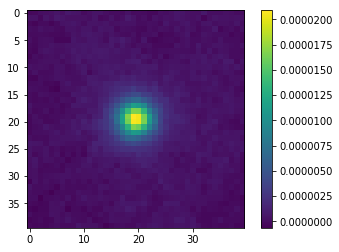

In [18]:
comb_stack = stack(ra, dec, boss_map, boss_mask, d56_map, d56_mask)
plt.imshow(comb_stack)
plt.colorbar()
plt.show()
#plt.savefig("comb_stack_act_y.png")
plt.close()

Number above cut: 2839
Number in stack: 411


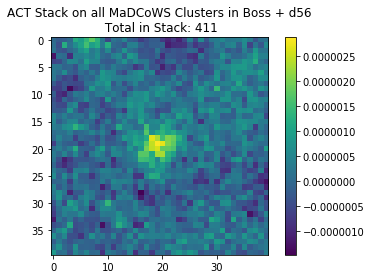

In [76]:
mdcw_ra = mdcw_catalog[1].data['RADeg']
mdcw_dec =mdcw_catalog[1].data['decDeg']
mdcw_ra, mdcw_dec = np.array(mdcw_ra), np.array(mdcw_dec)

print("Number above cut: {}".format(len(mdcw_ra)))

mdcw_stack, stack_num = stack(mdcw_ra, mdcw_dec, boss_map, boss_mask, d56_map, d56_mask)
plt.imshow(mdcw_stack)
plt.colorbar()
plt.title("ACT Stack on all MaDCoWS Clusters in Boss + d56\n Total in Stack: {}".format(stack_num))
plt.savefig("mdcw_stack_act_y.png")
plt.show()
plt.close()

Number above cut: 293
Number in stack: 46


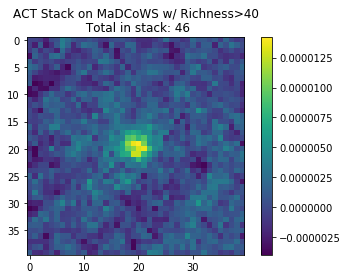

In [77]:
#print(mdcw_catalog[1].header)

rich_cut = 40
mdcw_cut = np.where((rich_cut<np.array(mdcw_catalog[1].data['Rich'])) & (np.array(mdcw_catalog[1].data['Rich'])<1000))[0]

print("Number above cut: {}".format(len(mdcw_cut)))

mdcw_cut_ra = mdcw_ra[mdcw_cut]
mdcw_cut_dec = mdcw_dec[mdcw_cut]

mdcw_stack, stack_num = stack(mdcw_cut_ra, mdcw_cut_dec, boss_map, boss_mask, d56_map, d56_mask)
plt.imshow(mdcw_stack)
plt.colorbar()
plt.title("ACT Stack on MaDCoWS w/ Richness>{}\n Total in stack: {}".format(rich_cut, stack_num))
plt.savefig("mdcw_cut_stack_act_y.png")
plt.show()
plt.close()